(-0.9933554817275747, 600.3787375415283, array([244, 545]), array([244, 545]))
Equação da reta: y = -0.9933554817275747x + 600.3787375415283
Pontos da reta: (244, 244) e (545, 545)
Inliers: 301
Outliers: 476
[  2 592]
[596  15]


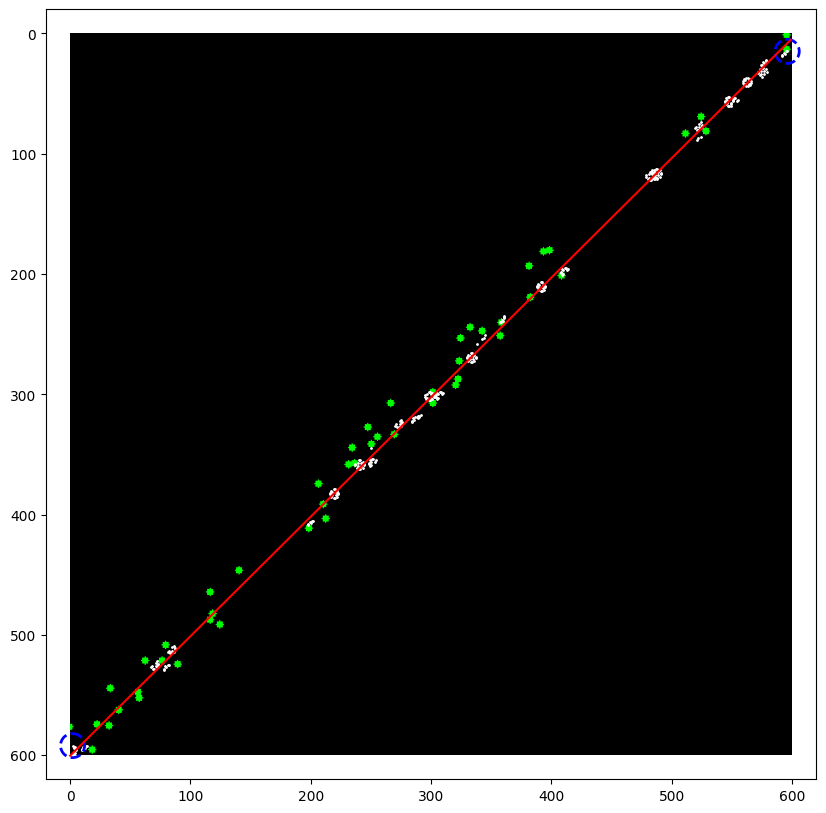

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def ransac_line(points, num_iter, threshold):
    best_line = (0, 0, 0, 0)
    max_inliers = []

    for _ in range(num_iter):
        sample_points = points[np.random.choice(points.shape[0], 2, replace=False)]
        x_coords, y_coords = sample_points[:, 0], sample_points[:, 1]

        if x_coords[0] == x_coords[1]:
            continue

        a = (y_coords[1] - y_coords[0]) / (x_coords[1] - x_coords[0]) # Coeficiente angular
        b = y_coords[1] - a * x_coords[1] # Coeficiente linear

        distances = np.abs(a * points[:, 0] - points[:, 1] + b) / np.sqrt(a**2 + 1) # Distância de um ponto a reta
        inliers = points[distances < threshold]

        if len(inliers) > len(max_inliers):
            max_inliers = inliers
            best_line = (a, b, x_coords, x_coords)

    return best_line, max_inliers

img = cv2.imread('imagens/pontos_ransac.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

harris = cv2.cornerHarris(gray, 2, 3, 0.04)

corners_threshold = 0.01 * harris.max()
corner_mask = harris > corners_threshold

# Obtem os pontos de interesse
points = np.column_stack(np.where(corner_mask))

if len(points) < 2:
    raise Exception('Menos de dois pontos de interesse encontrados!')

line, inliers = ransac_line(points, 50, 5)
print(line)

if len(inliers) > 0:
    x1, y1 = int(line[2][0]), int(line[3][0])
    x2, y2 = int(line[2][1]), int(line[3][1])

    x = np.arange(0, img.shape[1])
    y = line[0] * x + line[1]

    print(f"Equação da reta: y = {line[0]}x + {line[1]}")
    print(f'Pontos da reta: ({x1}, {y1}) e ({x2}, {y2})')

print(f'Inliers: {len(inliers)}')
print(f'Outliers: {len(points) - len(inliers)}')

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.plot(x, y, 'r')
plt.scatter(inliers[:, 0], inliers[:, 1], color='white', s=1, label='Inliers')
for inlier in [inliers[0], inliers[-1]]:
    print(inlier)
    circle = plt.Circle((inlier[0], inlier[1]), 10, color='cyan', fill=False, lw=2, linestyle='--', label="Pontos")
    plt.gca().add_patch(circle)
padding = 20  # Adicionar algum espaço ao redor dos dados
plt.xlim([0 - padding, img.shape[1] + padding])
plt.ylim([0 - padding, img.shape[0] + padding])

plt.gca().invert_yaxis()
plt.show()


    

